<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 3</h2></center>
<center><h3>Audio</h3></center>
<center><h3>Profesor: Jorge Cardenas </h3></center>

<center><h3>Por: France Mart칤nez </h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


# Ayudant칤a
## 1.1 Realiza la operaci칩n de convoluci칩n

<p align="justify">
Una de las operaciones m치s comunes en tratamiento de imagenes, video etc, es la convoluci칩n. Comienza por realizar una convoluci칩n entre una se침al Pulso y una funci칩n impulso filtrada.


<center><img src="../../assets/scipy-signal-convolution.png"/></center>




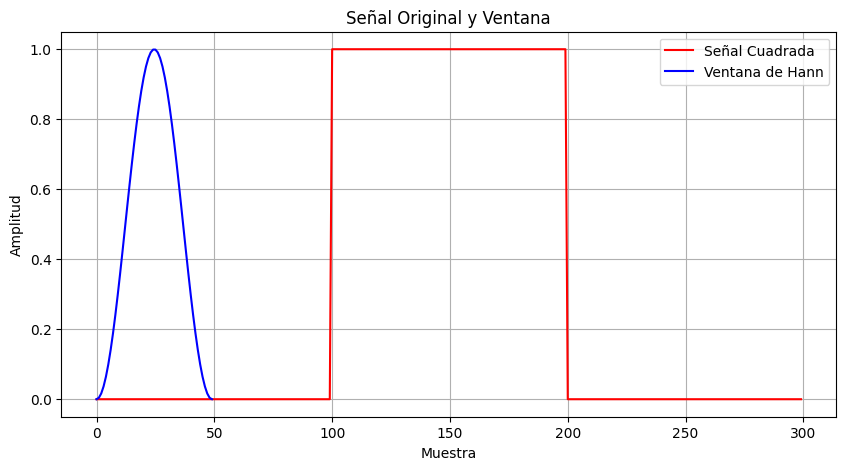

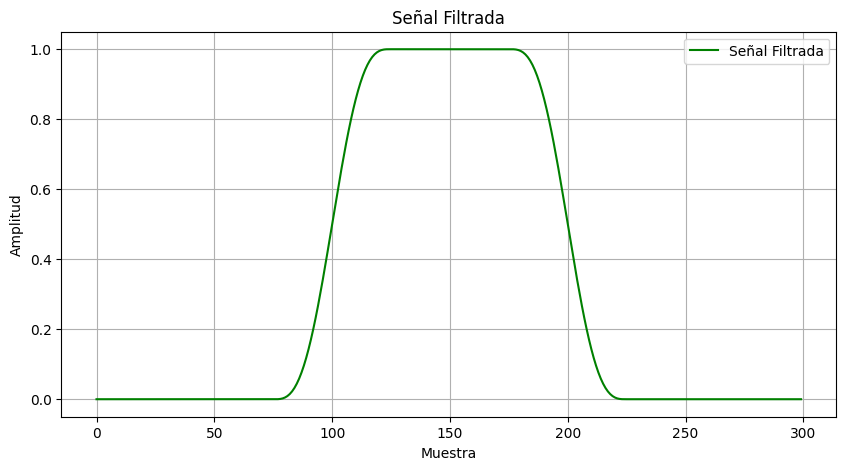

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

senal = np.repeat([0., 1., 0.], 100) # Se genera una se침al cuadrada
ventana = signal.windows.hann(50) # Se establece una ventana de Hann

# Se침al Original y Ventana
fig1, ax1 = plt.subplots(figsize=(10, 5)) # Creamos la primera figura y su eje
ax1.plot(senal, color="r", label="Se침al Cuadrada")
ax1.plot(ventana, color="b", label="Ventana de Hann")
ax1.grid(True)
ax1.set_title("Se침al Original y Ventana")
ax1.set_xlabel("Muestra")
ax1.set_ylabel("Amplitud")
ax1.legend()

# Se침al Filtrada
senal_filtrada = signal.convolve(senal, ventana, mode="same") / np.sum(ventana) # Convoluci칩n y normalizaci칩n
fig2, ax2 = plt.subplots(figsize=(10, 5)) # Se crea la segunda figura
ax2.plot(senal_filtrada, color="g", label="Se침al Filtrada")
ax2.grid(True)
ax2.set_title("Se침al Filtrada")
ax2.set_xlabel("Muestra")
ax2.set_ylabel("Amplitud")
ax2.legend()

plt.show()

## 1.2 Aplique la transformada r치pida de fourier a una se침al de audio
<p align="justify">
El archivo de audio debe ser formato .WAV, con menos de 30 segundo de duraci칩n.

C:\Users\frama\AppData\Local\Temp\ipykernel_24304\1374322487.py:16: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, audio_data = wavfile.read(audio_filename)


Tasa de muestreo: 44100 Hz
N칰mero de muestras: 1764000
Duraci칩n: 40.00 segundos


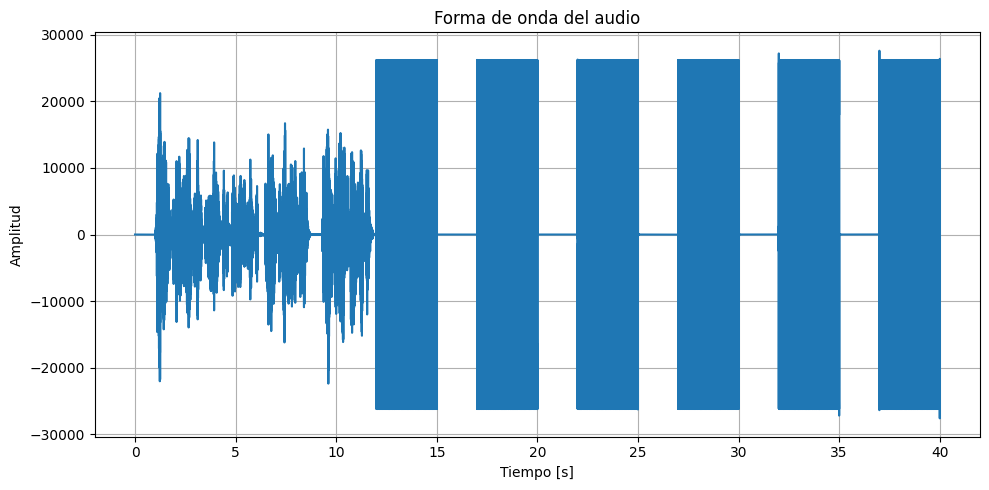

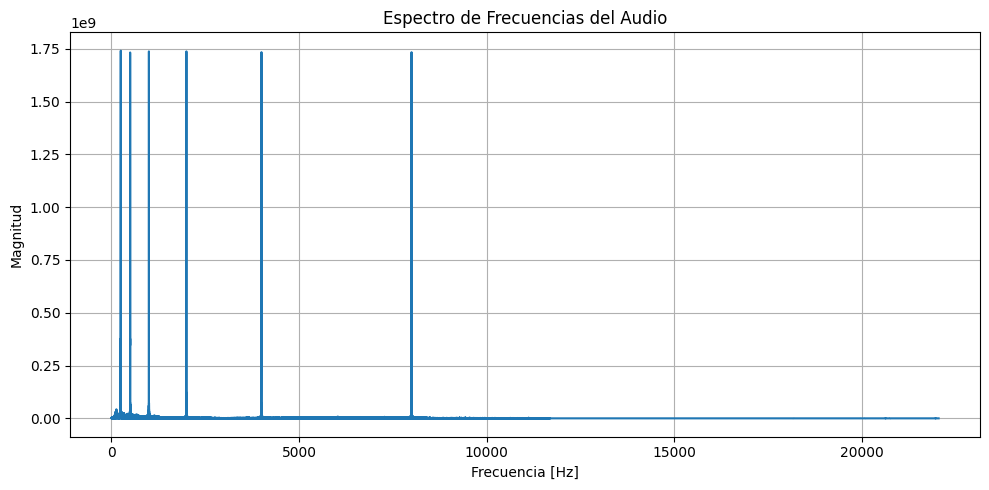

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import fft, fftfreq
import os

# === Cargar archivo de audio local ===
# Cambia este nombre por el nombre de tu archivo .wav
audio_filename = "pure-tone.wav"

# Verifica que el archivo exista
if not os.path.exists(audio_filename):
    raise FileNotFoundError(f"No se encontr칩 el archivo: {audio_filename}")

# Leer el archivo de audio
sample_rate, audio_data = wavfile.read(audio_filename)

# Si el audio es est칠reo, tomar solo un canal
if len(audio_data.shape) == 2:
    audio_data = audio_data[:, 0]

# Mostrar informaci칩n b치sica
print(f"Tasa de muestreo: {sample_rate} Hz")
print(f"N칰mero de muestras: {len(audio_data)}")
duration = len(audio_data) / sample_rate
print(f"Duraci칩n: {duration:.2f} segundos")

# === Mostrar forma de onda ===
plt.figure(figsize=(10, 5))
time_axis = np.linspace(0, duration, len(audio_data))
plt.plot(time_axis, audio_data)
plt.title("Forma de onda del audio")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.tight_layout()
plt.show()

# FFT
N = len(audio_data)
yf = fft(audio_data)
xf = fftfreq(N, 1 / sample_rate)

# Tomar la mitad del espectro (frecuencias positivas)
xf = xf[:N // 2]
yf = np.abs(yf[:N // 2])

# Graficar espectro de frecuencias
plt.figure(figsize=(10, 5))
plt.plot(xf, yf)
plt.title("Espectro de Frecuencias del Audio")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")
plt.grid(True)
plt.tight_layout()
plt.show()

## 2. Cancelaci칩n de Ruido (Denoising)
<p align="justify">
Implementa un algoritmo para eliminar el ruido de una se침al. Puedes apoyarte en esta referencia (https://www.youtube.com/watch?v=s2K1JfNR7Sc)

1. Debes tener la se침al original
2. Debes agregar ruido a la se침al
3. Obtener el valor medio de la se침al con ruido
4. Implementar transformaciones y filtrado.
    


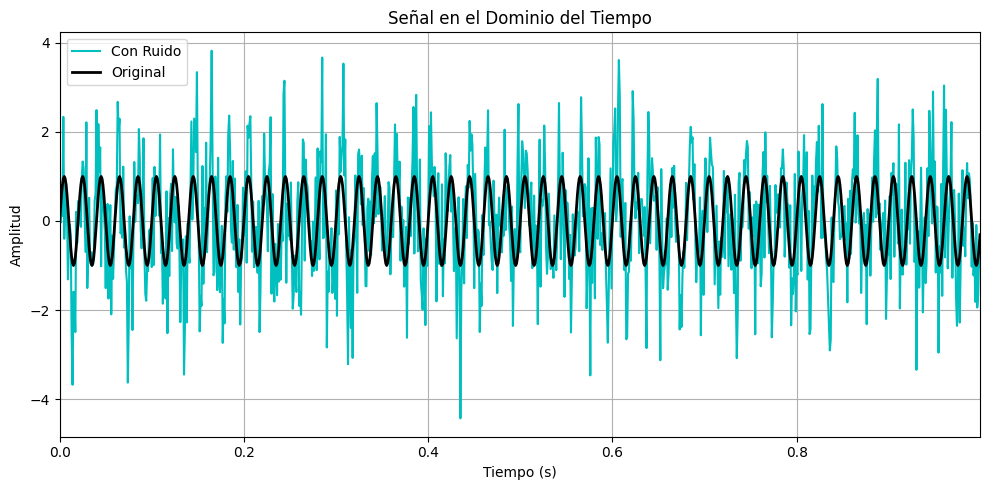

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Par치metros de la se침al
dt = 0.001
t = np.arange(0, 1, dt)
frecuencia_sinusoidal = 50
senal_original = np.sin(2 * np.pi * frecuencia_sinusoidal * t)

# Agregar ruido
ruido = np.random.randn(len(t))
senal_con_ruido = senal_original + ruido

# Visualizaci칩n en el dominio del tiempo
plt.figure(figsize=(10, 5))
plt.plot(t, senal_con_ruido, color="c", linewidth=1.5, label="Con Ruido")
plt.plot(t, senal_original, color="k", linewidth=2, label="Original")
plt.title("Se침al en el Dominio del Tiempo")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.xlim(t[0], t[-1])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

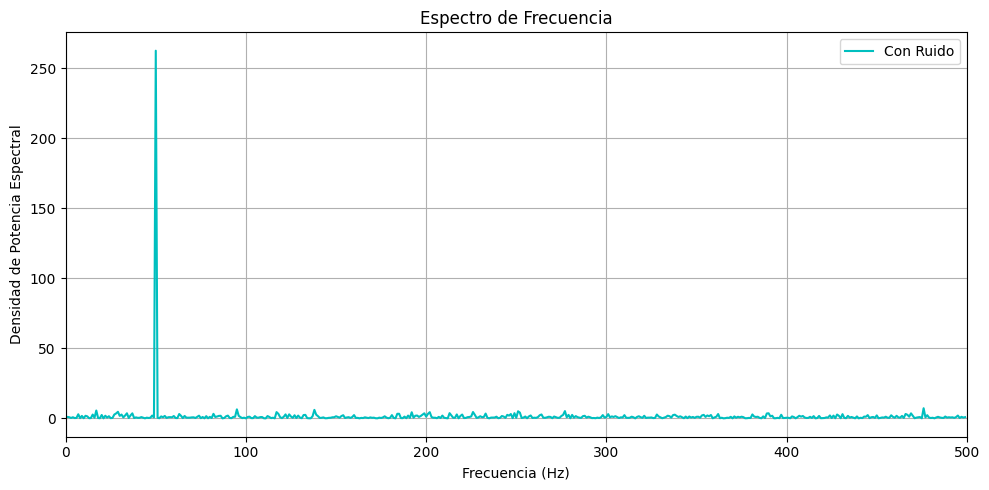

In [5]:
# An치lisis en el dominio de la frecuencia
n = len(t)
transformada_fft = np.fft.fft(senal_con_ruido)
espectro_potencia = np.abs(transformada_fft)**2 / n  # Usamos la potencia del espectro
frecuencias = np.fft.fftfreq(n, dt)
indices_positivos = np.where(frecuencias >= 0)[0] # Consideramos solo frecuencias positivas

plt.figure(figsize=(10, 5))
plt.plot(frecuencias[indices_positivos], espectro_potencia[indices_positivos], color="c", linewidth=1.5, label="Con Ruido")
plt.title("Espectro de Frecuencia")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Densidad de Potencia Espectral")
plt.xlim(0, 1/(2*dt)) # L칤mite hasta la frecuencia de Nyquist
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

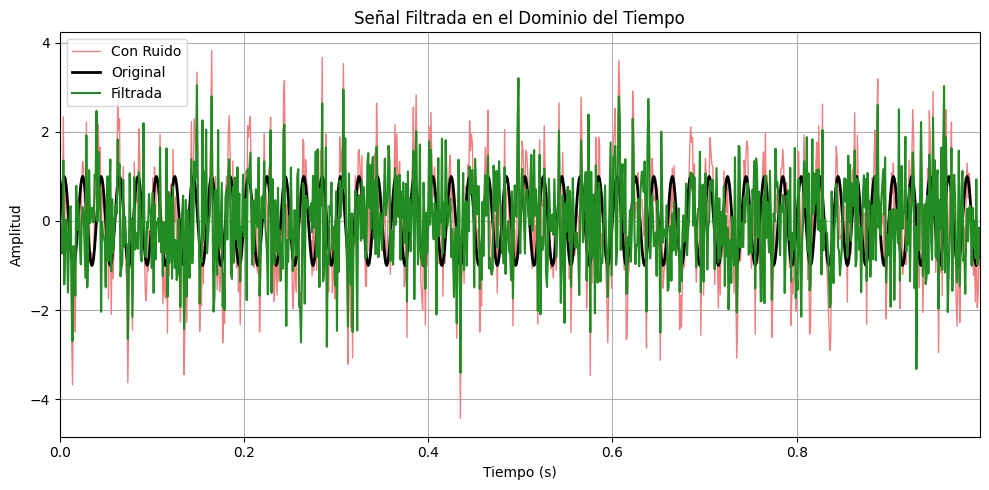

In [6]:
# Filtrado b치sico en el dominio de la frecuencia
umbral_potencia = 100
indices_ruido = espectro_potencia > umbral_potencia
transformada_fft_filtrada = transformada_fft.copy()
transformada_fft_filtrada[indices_ruido] = 0  # Atenuamos las frecuencias con alta potencia (ruido)

senal_filtrada = np.fft.ifft(transformada_fft_filtrada).real # Volvemos al dominio del tiempo (parte real)

# Visualizaci칩n de la se침al filtrada
plt.figure(figsize=(10, 5))
plt.plot(t, senal_con_ruido, color="lightcoral", linewidth=1, label="Con Ruido")
plt.plot(t, senal_original, color="k", linewidth=2, label="Original")
plt.plot(t, senal_filtrada, color="forestgreen", linewidth=1.5, label="Filtrada")
plt.title("Se침al Filtrada en el Dominio del Tiempo")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.xlim(t[0], t[-1])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

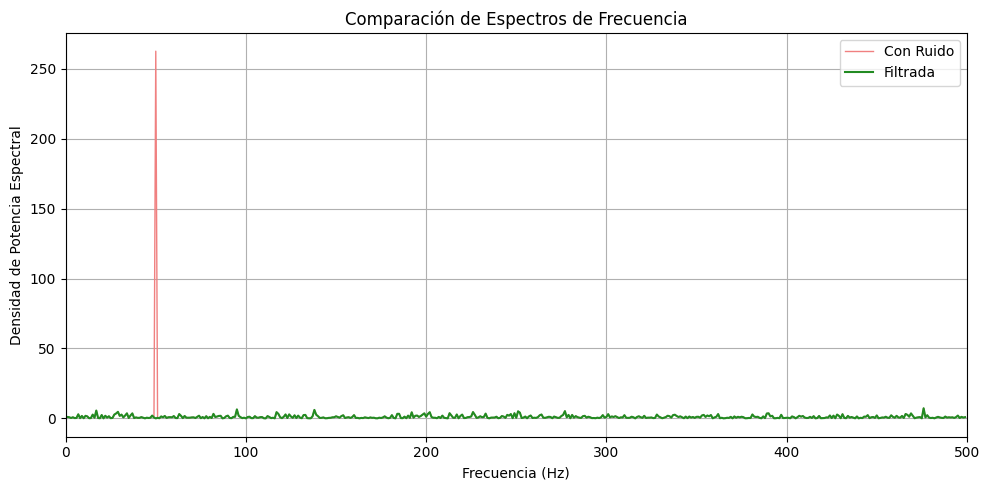

In [7]:
# Comparaci칩n de espectros
espectro_potencia_filtrado = np.abs(transformada_fft_filtrada)**2 / n

plt.figure(figsize=(10, 5))
plt.plot(frecuencias[indices_positivos], espectro_potencia[indices_positivos], color="lightcoral", linewidth=1, label="Con Ruido")
plt.plot(frecuencias[indices_positivos], espectro_potencia_filtrado[indices_positivos], color="forestgreen", linewidth=1.5, label="Filtrada")
plt.title("Comparaci칩n de Espectros de Frecuencia")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Densidad de Potencia Espectral")
plt.xlim(0, 1/(2*dt))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 3. Wavelets
### 3.1 Desarrolla una transformada wavelet 1D
<p align="justify">
Implementa transformaciones con 1-D wavelet usando la funci칩n Mexican Hat Wavelet.

$$m(x) = \frac{2}{\sqrt{3 \sigma} \pi^{\frac{1}{4}}} \left(1-\frac{x^2}{\sigma^2}\right) e^{\frac{-x^2}{2 \sigma^2}}$$


In [8]:
import numpy as np
import matplotlib.pyplot as plt

def mexican_hat(x, mu, sigma):
  factor1=2/((np.sqrt(3)*sigma)*np.pi**(1/4)) #subdividimos en 3 factores el mexican hut por simplicidad
  factor2=(1-(x**2)/sigma**2)
  wavelet=factor1*factor2*np.exp(-x**2/(2*sigma**2))
  return wavelet


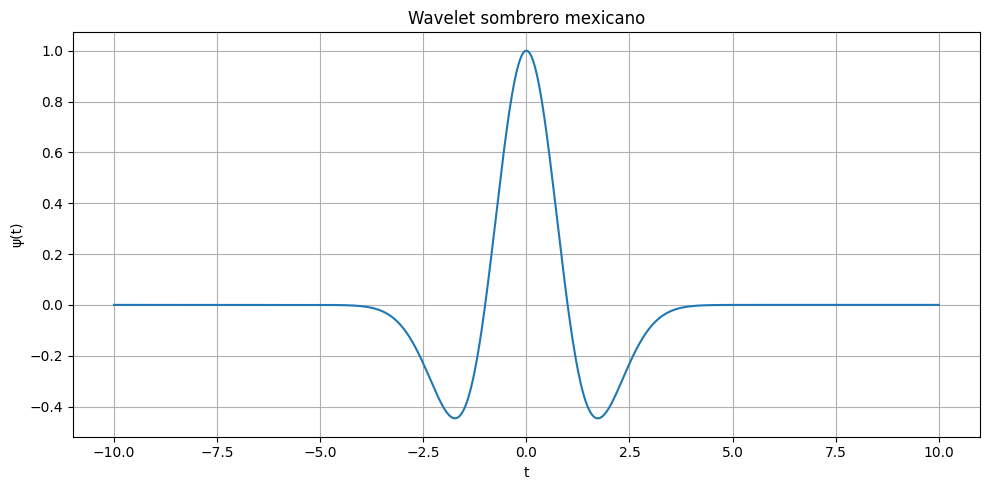

In [34]:
x=np.linspace(-10,10,1000)
y = mexican_hat(x,0,1)

plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.title("Wavelet sombrero mexicano")
plt.xlabel("t")
plt.ylabel("픧(t)")
plt.grid(True)
plt.tight_layout()
plt.show()

### 3.2 Escribe un algoritmo para calcular la transformada discreta
<p align="justify">
En cierta forma se trata solo de aplicar al sumatoria sobre una se침al que tengas (obviamente debes definir una se침al de estudio, con ruido o que tenga var칤as frecuencias involucradas).

Debes hacerlo solo para un nivel (level). Recuerda que la transformada trabaja por niveles y puede ser dispendioso. En este caso de debe considerar que $$a_0=2$$ y $$b_0=1$$, as칤 como tambi칠n debe asumir un valor espec칤fico para _m_.

En teor칤a, la transformada es como sigue:

$$ (T^{\text{wav}} f)(a,b) = \sqrt{|a|} \int dt \; f(t) \psi \left(\frac{t-b}{a}\right) $$

$a = a_0^m$ and $b = n b_0 a_0^m$

Aqu칤 a y b son par치metros para la escala y posici칩n de la wavelet. Esto se puede escribir de forma discreta de tal forma que puedas asignar una posici칩n y escala a la onda asignando los valores que quieres, pero en este caso usar치s $$a_0=2$$ y $$b_0=1$$.

$$ (T^{\text{wav}} f)(a,b) = T^\text{wav}_{m,n}(f) = \int dt \; f(t) \psi_{m,n} (x) $$
con
$$ \psi_{m,n} = a_0^{\frac{-m}{2}} \psi\left(a_0^{-m}x - nb_0\right) $$

### Recuerda que la integral se convierte en una sumatoria.

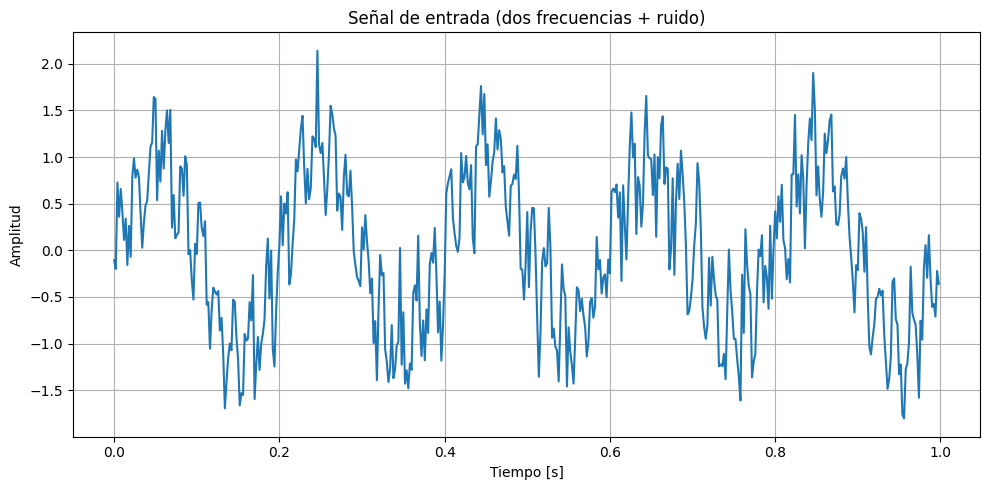

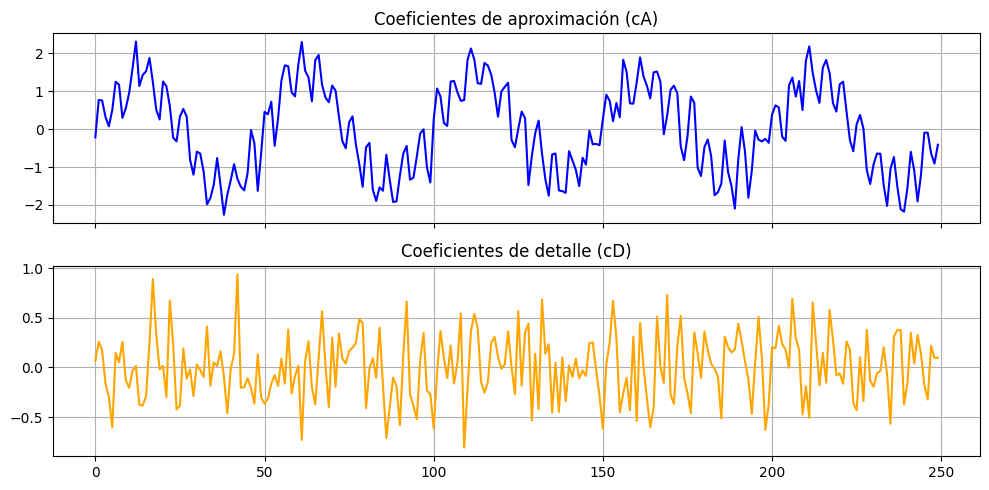

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

# Definir una se침al de ejemplo: suma de dos senoidales con ruido
fs = 500  # Frecuencia de muestreo
t = np.linspace(0, 1, fs, endpoint=False)
f1, f2 = 5, 50  # Frecuencias de las senoidales
signal = np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t)
signal += 0.3 * np.random.randn(*t.shape)  # Agregar ruido

# Graficar la se침al original
plt.figure(figsize=(10, 5))
plt.plot(t, signal)
plt.title("Se침al de entrada (dos frecuencias + ruido)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.tight_layout()
plt.show()

# Aplicar la Transformada Wavelet Discreta nivel 1 usando wavelet Haar
wavelet = 'haar'
cA, cD = pywt.dwt(signal, wavelet)

# Graficar los coeficientes
fig, axs = plt.subplots(2, 1, figsize=(10, 5), sharex=True)
axs[0].plot(cA, color='blue')
axs[0].set_title("Coeficientes de aproximaci칩n (cA)")
axs[0].grid(True)
axs[1].plot(cD, color='orange')
axs[1].set_title("Coeficientes de detalle (cD)")
axs[1].grid(True)
plt.tight_layout()
plt.show()


###  3.2.1. Explica el siguiente fragmento de c칩digo en detalle

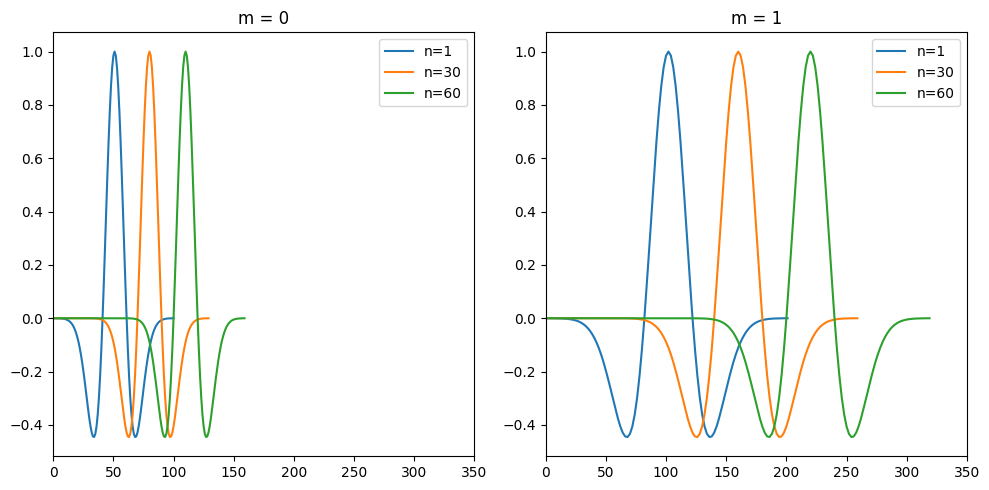

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la wavelet sombrero mexicano
def mexican_hat(t, mu=0, sigma=1):
    t_scaled = (t - mu) / sigma
    return (1 - t_scaled**2) * np.exp(-t_scaled**2 / 2)

# Definir psi_mn como wavelet escalada y trasladada
def psi_mn(psi, m, n):
    a = 2**m
    b = n * a
    length = len(psi) * a + b
    wav = np.zeros(length)
    wav[b:b + len(psi) * a] = np.interp(np.arange(len(psi) * a) / a, np.arange(len(psi)), psi)
    return wav

# Wavelet base
psi = mexican_hat(np.arange(-5, 5, 0.1))

# Rango de visualizaci칩n
xlim = (0, 350)
ns = [1, 30, 60]
ms = [0, 1]

# Graficar
plt.figure(figsize=(10, 5))

for mi in range(len(ms)):
    m = ms[mi]
    plt.subplot(1, len(ms), mi + 1)
    for n in ns:
        plt.plot(psi_mn(psi, m, n), label=f"n={n}")
    plt.title(f"m = {m}")
    plt.legend(loc="best")
    plt.xlim(xlim)

plt.tight_layout()
plt.show()


En esta secci칩n se visualizan distintas versiones de una funci칩n wavelet madre, espec칤ficamente la **wavelet sombrero mexicano**, al ser modificada por **factores de escala y traslaci칩n** discretos. Esto se realiza mediante la f칩rmula general para una wavelet discreta:

$
\psi_{m,n}(x) = a_0^{-m/2} \cdot \psi\left( \frac{x - n b_0 a_0^m}{a_0^m} \right)
$

donde:

$a_0 = 2$ es la base del escalamiento (zoom),
$b_0 = 1$ es la base del desplazamiento,
$m \in \mathbb{Z}$ controla el nivel de **escala** (m치s grande o m치s peque침a),
$n \in \mathbb{Z}$ determina la **posici칩n** de la wavelet en el tiempo.

En el c칩digo implementado, se define una funci칩n psi\_mn que aplica esta f칩rmula para transformar la wavelet madre. Para cada par $(m, n)$:
Se calcula la nueva **escala** como $a = 2^m$.
Se calcula el **desplazamiento** como $b = n \cdot 2^m$.
Luego, se interpola la funci칩n original para obtener una versi칩n escalada y ubicada en la nueva posici칩n.

El gr치fico generado muestra varias wavelets:
Para $m = 0$, la wavelet mantiene su forma original, desplaz치ndose seg칰n $n$.
Para $m = 1$, la wavelet se ve m치s ancha, lo que refleja una mayor escala y una menor resoluci칩n en frecuencia.

Desde el punto de vista de la transformada wavelet, **cada par $(m, n)$ define una base de an치lisis**, y los coeficientes que se obtienen en una DWT real corresponden a los pesos con que cada una de estas versiones escaladas y trasladadas de $\psi(x)$ contribuye a reconstruir la se침al original.

Este ejercicio ayuda a entender **qu칠 significan visualmente los coeficientes de la transformada wavelet**: indican **cu치nto se parece** la se침al original a una wavelet localizada en una posici칩n y con una cierta escala.


### 3.2.2 completa el siguiente c칩digo para realizar la transformada


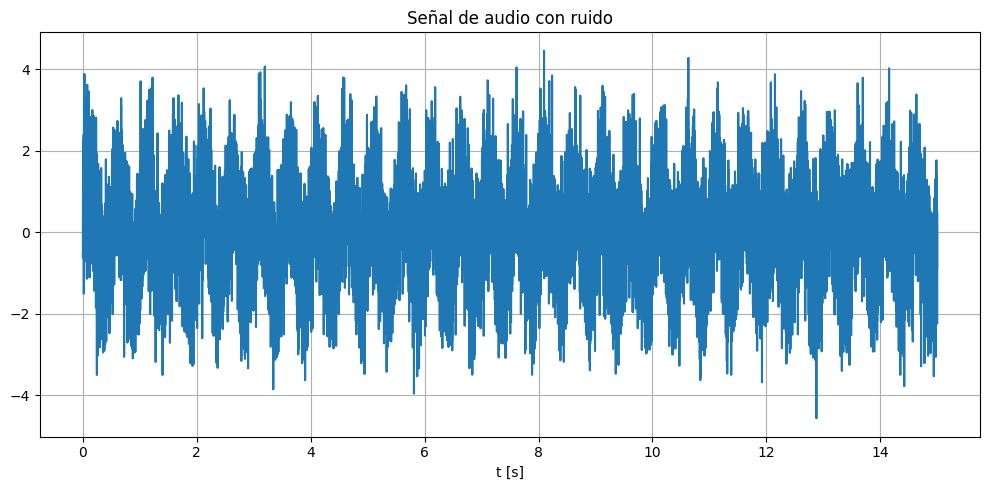

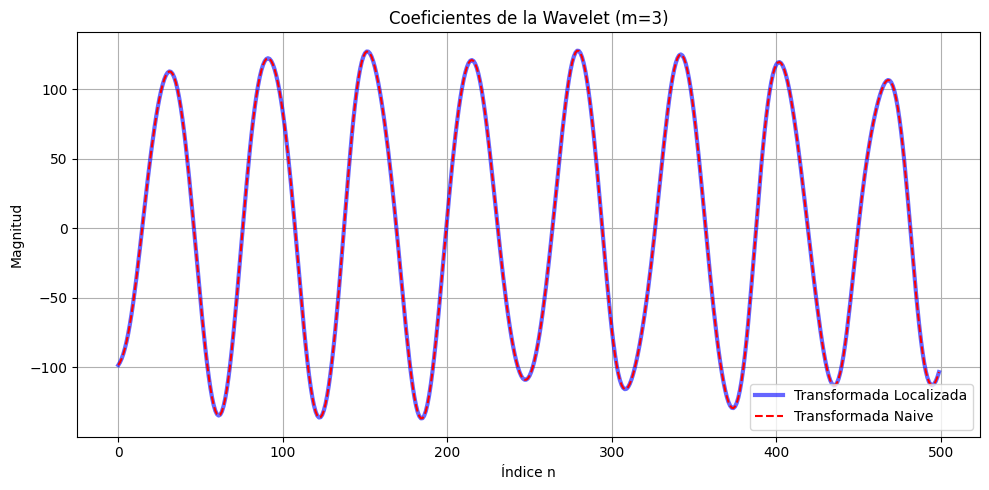

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Wavelet sombrero mexicano (mexican hat)
def mexican_hat(t):
    return (1 - t**2) * np.exp(-t**2 / 2)

# Wavelet discreta escalada y trasladada
def psi_mn(psi, m, n, length):
    a = 2 ** m
    b = n * a
    scaled_len = len(psi) * a
    psi_scaled = np.interp(np.arange(scaled_len) / a, np.arange(len(psi)), psi)
    psi_translated = np.zeros(length)
    end = min(b + scaled_len, length)
    psi_translated[b:end] = psi_scaled[:end - b]
    return psi_translated

# Transformada wavelet discreta (ventana localizada)
def twav_mn(f, psi_base, m, n):
    psi = psi_mn(psi_base, m, n, len(f))
    return np.sum(f * psi)

# Transformada naive (sin recorte, sobre todo el dominio)
def twav_mn_naive(f, psi_base, m, n):
    psi = psi_mn(psi_base, m, n, len(f))
    return np.dot(f, psi)  # Producto punto total

# Par치metros de la se침al
m = 3
ns = np.arange(1000, 1500)
res = 1000
freq = 2

# Crear se침al con ruido
x = np.arange(15000)
noise = np.random.normal(0, 1, len(x))
audio = np.sin(x * 2 * np.pi * freq / res) + noise

# Definir wavelet base
t = np.linspace(-5, 5, 100)
psi = mexican_hat(t)

# Aplicar transformadas
transformed_sweep = [twav_mn(audio, psi, m, n) for n in ns]
naive_transformed_sweep = [twav_mn_naive(audio, psi, m, n) for n in ns]

# Graficar se침al original
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(audio), dtype="float32") / res, audio)
plt.xlabel("t [s]")
plt.title("Se침al de audio con ruido")
plt.grid(True)
plt.tight_layout()
plt.show()

# Graficar coeficientes wavelet
plt.figure(figsize=(10, 5))
plt.plot(transformed_sweep, color="blue", lw=3, alpha=0.6, label="Transformada Localizada")
plt.plot(naive_transformed_sweep, "r--", label="Transformada Naive")
plt.title("Coeficientes de la Wavelet (m=3)")
plt.xlabel("칈ndice n")
plt.ylabel("Magnitud")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


En el gr치fico se comparan dos formas de aplicar la transformada wavelet a una se침al: la transformada localizada (azul) y la naive (roja punteada). La transformada localizada aplica la wavelet solo sobre una ventana espec칤fica de la se침al en cada posici칩n 洧녵, lo que permite detectar caracter칤sticas locales, como cambios o eventos transitorios. En cambio, la versi칩n naive aplica la wavelet sobre toda la se침al en cada paso, perdiendo esa capacidad de focalizarse en un tramo espec칤fico.

### 3.3 Wavelet usando librer칤a
<p align="justify">
Usa la librer칤a PyWavelets (pywt) con los datos provenientes del dataset  = "http://paos.colorado.edu/research/wavelets/wave_idl/sst_nino3.dat". Estos datos son hist칩ricos sobre el fen칩meno del Ni침o.

0. Debes descargar los datos desde python, usando numpy o pandas, debes aplicar la transformada continua pywt.cwt.

1. Obtendr치s los coeficientes de la transformaci칩n.
2. Debes poner todos los resultados en t칠rminos de potencia.
3. Debes graficar el resultado tanto en el periodo como en la frecuencia usando un plot tipo contour.

     -0.15
0    -0.30
1    -0.14
2    -0.41
3    -0.46
4    -0.66
..     ...
498  -0.22
499   0.08
500  -0.08
501  -0.18
502  -0.06

[503 rows x 1 columns]


C:\Users\frama\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pywt\_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should follow the format cmorB-C, where B and C are floats representing the bandwidth frequency and center frequency, respectively (example, for backward compatibility: cmor = cmor1.0-0.5).
  wavelet = DiscreteContinuousWavelet(wavelet)


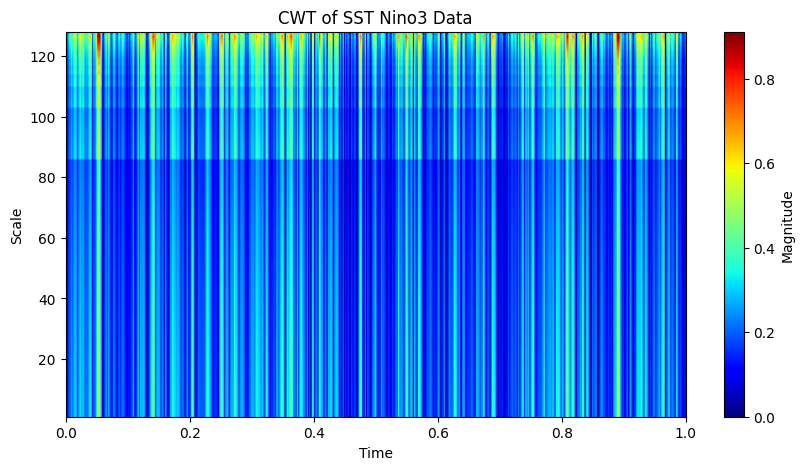

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
import pandas as pd


link = "http://paos.colorado.edu/research/wavelets/wave_idl/sst_nino3.dat"
df = pd.read_table(link) #Llamamos a los datos
print(df)
df
signal = np.array(df)  # Convertir los datos a un array NumPy

coefficients, frequencies = pywt.cwt(signal, scales=np.arange(1, 128), wavelet='cmor') #Ploteamos los datos recopilidos en una wavelet

plt.figure(figsize=(10, 5))
plt.imshow(np.abs(coefficients)**0.5, aspect='auto', cmap='jet', extent=[0, 1, 1, 128])
plt.colorbar(label="Magnitude")
plt.ylabel("Scale")
plt.xlabel("Time")
plt.title("CWT of SST Nino3 Data")
plt.show()

### 3.4 Interpreta los resultados del punto anterior.
<p align="justify">
Debes explicar que significa el gr치fico obtenido  en t칠rminos del periodo o frecuencia del evento que estamos analizando.

El gr치fico obtenido en el punto anterior muestra dos conjuntos de coeficientes generados por la Transformada Discreta de Wavelet (DWT):

Los **coeficientes de aproximaci칩n** ($cA$), que representan las componentes de baja frecuencia de la se침al.
Los **coeficientes de detalle** ($cD$), que contienen las variaciones de alta frecuencia.

Desde un punto de vista temporal-frecuencial, los **coeficientes de aproximaci칩n** permiten observar el comportamiento general o peri칩dico de la se침al, ya que retienen su estructura de baja frecuencia. Esto se traduce en una se침al m치s suavizada, que evidencia los componentes de mayor duraci칩n o per칤odo largo.

En cambio, los **coeficientes de detalle** revelan la informaci칩n r치pida de la se침al, es decir, aquellas variaciones que ocurren en intervalos de tiempo m치s cortos (alta frecuencia). Estos coeficientes permiten identificar eventos transitorios, picos, ruido o componentes con menor per칤odo.

La combinaci칩n de ambos conjuntos de coeficientes es fundamental, ya que nos permite descomponer y entender la se침al desde diferentes escalas. Esta capacidad multiescala es una de las principales ventajas de la transformada wavelet frente a otros m칠todos como la transformada de Fourier, ya que permite mantener informaci칩n tanto del contenido en frecuencia como de su localizaci칩n temporal.

El gr치fico muestra c칩mo la DWT separa la se침al original en partes que corresponden a distintos **rangos de frecuencia**, lo que permite analizar el comportamiento peri칩dico (bajo frecuencia) y los eventos puntuales o r치pidos (alta frecuencia) de manera simult치nea.


## 4. Obt칠n el espectrograma de tu se침al de audio
Sobre la se침al de audio en el punto 1 de la actividad, debe presentar el espectragrama


C:\Users\frama\AppData\Local\Temp\ipykernel_24304\1448777296.py:14: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, audio_data = wavfile.read(audio_filename)


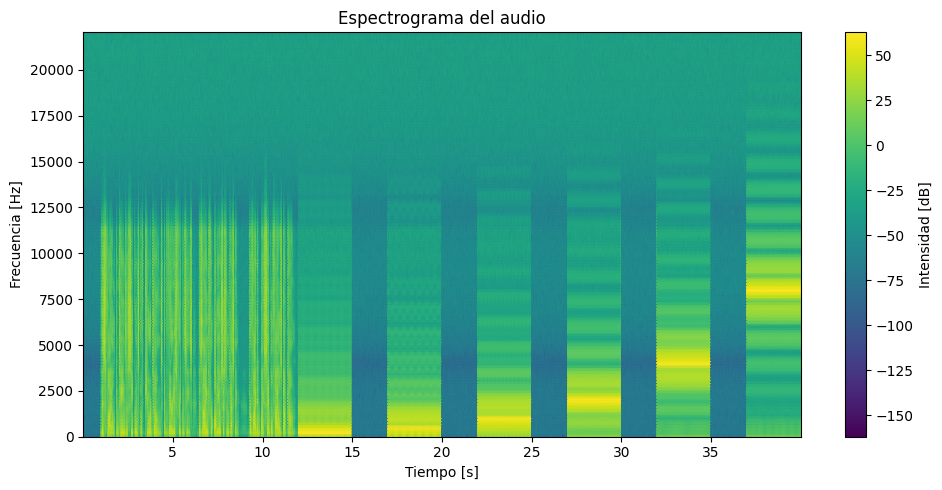

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import spectrogram
import os

# Cargar archivo WAV local
audio_filename = "pure-tone.wav"  # Cambia esto si tu archivo tiene otro nombre

if not os.path.exists(audio_filename):
    raise FileNotFoundError(f"No se encontr칩 el archivo: {audio_filename}")

# Leer el archivo de audio
sample_rate, audio_data = wavfile.read(audio_filename)

# Si el audio es est칠reo, usar solo un canal
if len(audio_data.shape) == 2:
    audio_data = audio_data[:, 0]

# Calcular espectrograma
frequencies, times, Sxx = spectrogram(audio_data, fs=sample_rate)

# Graficar espectrograma
plt.figure(figsize=(10, 5))
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud')
plt.title("Espectrograma del audio")
plt.ylabel("Frecuencia [Hz]")
plt.xlabel("Tiempo [s]")
plt.colorbar(label='Intensidad [dB]')
plt.tight_layout()
plt.show()

En el espectrograma se determina claramente cuando la persona habla al principio, luego se notan los momentos donde no hay audio, y luego se puede ver la concentraci칩n de energ칤a en las frecuencias donde se escuchan los tonos puros.

## 5. Slicing
Desarrolla un framento de c칩digo que te permita tomar una se침al de audio y framentarla en N segmentos o slices. Debe asignar la longitud temporal de cada slice y el programa debe indicar el n칰mero de slices que quedan. Considera que al final puede quedar un slice de longitud diferente a todos los demas.

En el slicing debes tambi칠n incluir un gap o overlap a lado y lado de cada uno de los fragmentos. Este overlap debe ser ajustable del n칰mero de muestras que constituyen dicho overlap.

<center><img src="../../assets/slices.png"/></center>


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import os

# Cargar archivo local
filename = "pure-tone.wav"  # Aseg칰rate que est칠 en la misma carpeta

if not os.path.exists(filename):
    raise FileNotFoundError(f"No se encontr칩 el archivo: {filename}")

# Leer el archivo de audio
sample_rate, audio = wavfile.read(filename)

# Convertir est칠reo a mono si es necesario
if len(audio.shape) == 2:
    audio = audio[:, 0]

# Par치metros de slicing
slice_duration_sec = 0.5        # duraci칩n de cada fragmento en segundos
overlap_samples = 100           # solapamiento en muestras
slice_length = int(slice_duration_sec * sample_rate)
step = slice_length - 2 * overlap_samples

if step <= 0:
    raise ValueError("El solapamiento es demasiado grande para el tama침o del fragmento.")

# Fragmentar la se침al
slices = []
start = 0
while start < len(audio):
    end = start + slice_length
    fragment = audio[start:end]
    # Si el 칰ltimo fragmento es corto, lo dejamos como est치 (puedes aplicar padding si prefieres)
    slices.append(fragment)
    start += step



C:\Users\frama\AppData\Local\Temp\ipykernel_24304\1675070504.py:13: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, audio = wavfile.read(filename)


## 5.1 Slicing usando Pytorch de la se침al obtenida en el primer punto.
Debes crear un array con los slices creados a partir de tensores en pytorch.
Grafica un par de tus slices y reproduce el audio.


N칰mero total de fragmentos: 81
Tama침o de cada fragmento: 22050 muestras


C:\Users\frama\AppData\Local\Temp\ipykernel_24304\3943470644.py:14: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, audio_np = wavfile.read(filename)


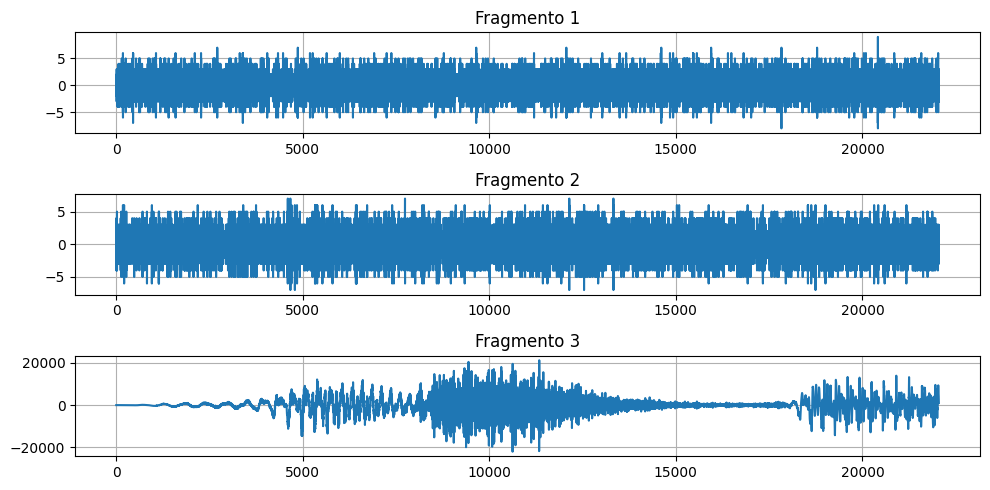

In [38]:
import torch
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
import os

# Cargar archivo local
filename = "pure-tone.wav"

if not os.path.exists(filename):
    raise FileNotFoundError(f"No se encontr칩 el archivo: {filename}")

# Leer archivo WAV
sample_rate, audio_np = wavfile.read(filename)

# Si es est칠reo, tomar solo un canal
if len(audio_np.shape) == 2:
    audio_np = audio_np[:, 0]

# Convertir a tensor de PyTorch
audio = torch.tensor(audio_np, dtype=torch.float32)

# Par치metros del slicing
slice_duration_sec = 0.5
overlap_samples = 100

# Calcular tama침o del slice y paso
slice_length = int(slice_duration_sec * sample_rate)
step = slice_length - 2 * overlap_samples

# Validar valores
if step <= 0:
    raise ValueError("El solapamiento es demasiado grande para el tama침o del fragmento.")

# Generar slices
slices = []
start = 0
while start < len(audio):
    end = start + slice_length
    fragment = audio[start:end]
    # Padding si el 칰ltimo fragmento es m치s corto
    if len(fragment) < slice_length:
        fragment = torch.nn.functional.pad(fragment, (0, slice_length - len(fragment)))
    slices.append(fragment)
    start += step

# Convertir lista a tensor (batch_size, slice_length)
sliced_audio = torch.stack(slices)

print(f"N칰mero total de fragmentos: {sliced_audio.shape[0]}")
print(f"Tama침o de cada fragmento: {sliced_audio.shape[1]} muestras")

# Visualizar los primeros 3 fragmentos
plt.figure(figsize=(10, 5))
for i in range(min(3, sliced_audio.shape[0])):
    plt.subplot(3, 1, i+1)
    plt.plot(sliced_audio[i].numpy())
    plt.title(f"Fragmento {i+1}")
    plt.grid(True)
plt.tight_layout()
plt.show()



Al aplicar slicing con PyTorch, se observa que los fragmentos extra칤dos muestran diferencias notables en la estructura de la se침al. Mientras los primeros fragmentos contienen datos m치s constantes, el tercer fragmento evidencia variaciones en frecuencia o amplitud, lo que indica la presencia de un evento ac칰stico espec칤fico en esa parte del audio.

## 6. Filtro Butterworth para una se침al de audio.
Dise침a y aplica un filtro butterworth a tu se침al de audio, para diferentes ordenes y niveles de rizado.
Muestra gr치ficos con las diferentes respuestas del filtro butterworth y explica el resultado.

C:\Users\frama\AppData\Local\Temp\ipykernel_24304\645970280.py:13: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, audio = wavfile.read(filename)


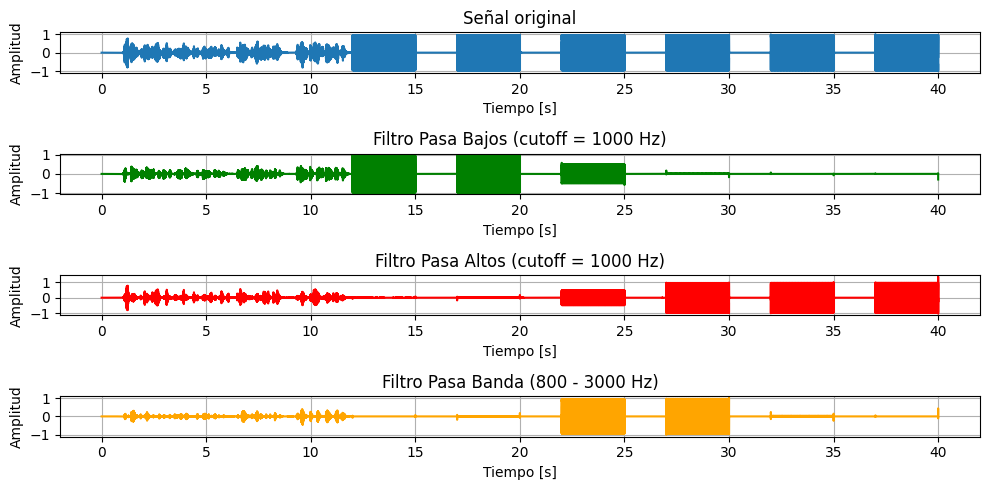

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import butter, filtfilt
import os

# === Cargar archivo local ===
filename = "pure-tone.wav"  # Cambiar si es necesario

if not os.path.exists(filename):
    raise FileNotFoundError(f"No se encontr칩 el archivo: {filename}")

sample_rate, audio = wavfile.read(filename)

# Convertir a mono si es est칠reo
if len(audio.shape) == 2:
    audio = audio[:, 0]

# Normalizar si es necesario
if audio.dtype != np.float32 and np.max(np.abs(audio)) > 1:
    audio = audio / np.max(np.abs(audio))

# Crear dominio temporal
time = np.linspace(0, len(audio) / sample_rate, len(audio))

# === Funci칩n para aplicar Butterworth ===
def aplicar_butter(audio, sample_rate, order, cutoff, btype):
    nyquist = 0.5 * sample_rate
    if btype == 'bandpass':
        normalized_cutoff = [f / nyquist for f in cutoff]
    else:
        normalized_cutoff = cutoff / nyquist
    b, a = butter(order, normalized_cutoff, btype=btype)
    return filtfilt(b, a, audio)

# Par치metros generales
order = 4

# Aplicar filtros
low_filtered = aplicar_butter(audio, sample_rate, order, 1000, 'low')
high_filtered = aplicar_butter(audio, sample_rate, order, 1000, 'high')
band_filtered = aplicar_butter(audio, sample_rate, order, [800, 3000], 'bandpass')

# === Graficar resultados ===
plt.figure(figsize=(10, 5))

plt.subplot(4, 1, 1)
plt.plot(time, audio)
plt.title("Se침al original")
plt.xlabel("Tiempo [s]"); plt.ylabel("Amplitud"); plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(time, low_filtered, color='green')
plt.title("Filtro Pasa Bajos (cutoff = 1000 Hz)")
plt.xlabel("Tiempo [s]"); plt.ylabel("Amplitud"); plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(time, high_filtered, color='red')
plt.title("Filtro Pasa Altos (cutoff = 1000 Hz)")
plt.xlabel("Tiempo [s]"); plt.ylabel("Amplitud"); plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(time, band_filtered, color='orange')
plt.title("Filtro Pasa Banda (800 - 3000 Hz)")
plt.xlabel("Tiempo [s]"); plt.ylabel("Amplitud"); plt.grid(True)

plt.tight_layout()
plt.show()




Se aplicaron tres variantes del filtro de Butterworth a la se침al de audio original:

**Filtro Pasa Bajos** (cutoff = 1000 Hz): elimin칩 las frecuencias altas, dejando solo las variaciones lentas o graves. La se침al resultante es m치s suave y menos ruidosa.

**Filtro Pasa Altos** (cutoff = 1000 Hz): elimin칩 las frecuencias bajas, dejando los componentes agudos. Se perciben m치s los detalles r치pidos y los bordes.

**Filtro Pasa Banda** (entre 800 y 3000 Hz): permiti칩 solo un rango medio de frecuencias. Se eliminan tanto los graves como los agudos fuera del rango, lo que puede ayudar a aislar contenido 칰til o deseado.

Estos filtros son 칰tiles para **limpiar se침ales**, **resaltar ciertos componentes** o preparar datos para an치lisis posteriores (por ejemplo, detecci칩n de eventos o clasificaci칩n).


## 7. Referencias
<p align="justify">

https://notebook.community/CSchoel/learn-wavelets/wavelet-introduction

https://www.kaggle.com/code/asauve/a-gentle-introduction-to-wavelet-for-data-analysis

https://pywavelets.readthedocs.io/en/latest/ref/cwt.html

[An치lisis espectral para audio] https://ccrma.stanford.edu/~jos/mdft/mdft-python.html

[Cancelaci칩n de ruido en datos] https://towardsdatascience.com/noise-cancellation-with-python-and-fourier-transform-97303314aa71

[Convoluci칩n en Scipy]https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html

[Wavelet transform applications]https://scicoding.com/introduction-to-wavelet-transform-using-python/

    
[An치lisis espectral para audio] https://ccrma.stanford.edu/~jos/mdft/mdft-python.html

[An치lisis espectral] https://currents.soest.hawaii.edu/ocn_data_analysis/_static/Spectrum.html

[pure tone] https://sample-files.com/audio/wav/